# Librerías y carga de datos

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
# matplotlib inline
datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/Analisis-Inteligente-de-datos/main/datos/datos.limpios.csv", encoding='latin1')


## Descripción de datos

In [50]:
datos.describe()
datos[['Estatura', 'PesoKgs']].describe()
datos.head()

,X,X,Name,Age,Nationality,Overall,Potential,Club,Preferred.Foot,International.Reputation,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Valor,Estatura,PesoKgs
0,1,1,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5,...,28,26,6,11,15,14,8,110500000,1.70,72.12
1,2,2,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5,...,31,23,7,11,15,14,11,77000000,1.88,83.01
2,3,3,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5,...,24,33,9,9,15,15,11,118500000,1.75,68.04
3,4,4,De Gea,27,Spain,91,93,Manchester United,Right,4,...,21,13,90,85,87,88,94,72000000,1.93,76.20
4,5,5,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4,...,58,51,15,13,5,10,13,102000000,1.80,69.85


## Renombrar columnas

In [4]:
datos.columns
datos = datos.rename(columns={'Unnamed: 0':'X'})
datos.columns

Index(['X', 'X', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Preferred.Foot', 'International.Reputation', 'Weak.Foot',
       'Skill.Moves', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Valor', 'Estatura',
       'PesoKgs'],
      dtype='object')

## Datos de entrenamiento y validación

In [5]:
estatura = datos.loc[:, 'Estatura'].values
pesokgs = datos.loc[:, 'PesoKgs'].values

# estatura = datos[['Estatura']].reshape(-1, 1)
estatura = estatura.reshape(-1, 1)
pesokgs = pesokgs.reshape(-1, 1)

estatura = datos[['Estatura']].to_numpy()
pesokgs = datos[['PesoKgs']].to_numpy()

print(f"Estatura:\n{estatura}\nPesoKgs:\n{pesokgs}")

Estatura:
[[1.7 ]
 [1.88]
 [1.75]
 ...
 [1.73]
 [1.78]
 [1.78]]
PesoKgs:
[[72.12]
 [83.01]
 [68.04]
 ...
 [67.13]
 [69.85]
 [79.83]]


### Test

In [6]:
estatura_train, estatura_test, pesokgs_train, pesokgs_test = train_test_split(estatura, pesokgs, test_size=0.3, random_state=2022)
estatura_train

array([[1.85],
       [1.93],
       [1.85],
       ...,
       [1.83],
       [1.75],
       [1.78]])

## Dispersión de datos

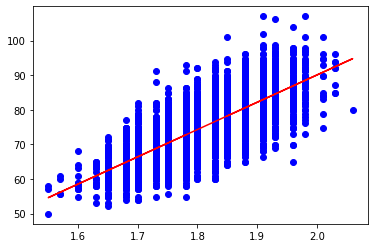

In [8]:
linea_tendencia = modelo.predict(estatura_train)
plt.plot(estatura_train, pesokgs_train, 'o', color= 'blue')
plt.plot(estatura_train, linea_tendencia, color="red")

## Modelo de regresión lineal

In [23]:
modelo = LinearRegression()
modelo.fit(estatura_train, pesokgs_train)

LinearRegression()

## Coeficientes

In [24]:
a = modelo.intercept_
b = modelo.coef_

print("Valor de a: ", a)
print("Valor de b; ", b)

Valor de a:  [-67.50986539]
Valor de b;  [[78.78539487]]


## Predicciones

In [10]:
predicciones = modelo.predict(estatura_test)
predicciones

pesokgs_test

array([[66.22],
       [77.11],
       [73.03],
       ...,
       [83.01],
       [79.83],
       [67.13]])

## Dataframe "comparaciones"

In [11]:
diccionario = {'Estatura': estatura_test.flatten().tolist(),
                'Real' : pesokgs_test.flatten().tolist(), 
               'Predicho' : predicciones.flatten().tolist()}
# diccionario

comparaciones = pd.DataFrame(diccionario)
comparaciones.head(20)
comparaciones.tail(20)

,Estatura,Real,Predicho
5353,1.93,79.83,84.545947
5354,1.93,86.18,84.545947
5355,1.85,78.02,78.243115
5356,1.75,73.94,70.364576
5357,1.91,79.83,82.970239
5358,1.83,78.93,76.667407
5359,1.78,72.12,72.728137
5360,1.91,82.10,82.970239
5361,1.93,91.17,84.545947
5362,1.78,78.02,72.728137


## Evaluación del modelo

In [12]:
print('Mean Absolute Error: MAE', metrics.mean_absolute_error(pesokgs_test, predicciones))
print('Mean Squared Error: MSE', metrics.mean_squared_error(pesokgs_test, predicciones))
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(pesokgs_test, predicciones)))

r = np.corrcoef(estatura_train.flatten().tolist(), pesokgs_train.flatten().tolist())
r = r ** 2
r = r.reshape(-1,2)
r = r[0, 1]
print('Multiple R Square :', np.round(r, 4) )

Mean Absolute Error: MAE 3.632652042179122
Mean Squared Error: MSE 21.813749730525867
Root Mean Squared Error RMSE: 4.670519214233667
Multiple R Square : 0.5681


# Apreciación personal e Interpretación
## Descripción
Esta apreciación valorará la reputación internacional de los jugadores contra el valor que estos tengan en el mercado.

## Datos de entrenamiento y validación

In [22]:
repInt = datos.loc[:, 'International.Reputation'].values
valor = datos.loc[:, 'Valor'].values

# estatura = datos[['Estatura']].reshape(-1, 1)
repInt = repInt.reshape(-1, 1)
valor = valor.reshape(-1, 1)

repInt = datos[['International.Reputation']].to_numpy()
valor = datos[['Valor']].to_numpy()
print(f"International.Reputation:\n{repInt}\nValor:\n{valor}")


International.Reputation:
[[5]
 [5]
 [5]
 ...
 [1]
 [1]
 [1]]
Valor:
[[110500000]
 [ 77000000]
 [118500000]
 ...
 [    60000]
 [    60000]
 [    60000]]


### Test

In [32]:
repInt_train, repInt_test, valor_train, valor_test = train_test_split(repInt, valor, random_state=2022)
repInt_train
valor_train

array([[3900000],
       [2400000],
       [ 975000],
       ...,
       [1400000],
       [  90000],
       [7500000]], dtype=int64)

## Dispersión de datos

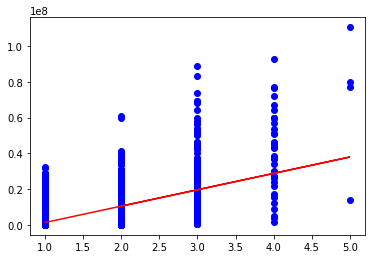

In [34]:
linea_tendencia = modelo.predict(repInt_train)
plt.plot(repInt_train, valor_train, 'o', color= 'blue')
plt.plot(repInt_train, linea_tendencia, color="red")

Primero que nada, quiero hacer la observación de que el eje de las y está representado en notación científica 1e8, siendo la escala de 1:100 millones, donde 1 representa 100 millones 0.1:10 millones y así respectivamente.
Como podemos observar, los jugadores con reputación internacional de 1, no pasan del máximo de 40 millones de dólares en el mercado, mientras que de los pocos que jugadores con reputación internacional de 5, la mayoría supera los ~70 millones de dólares. Esto hace que la línea de tendencia del modelo esté inclinada y conforme avance esta suba en el eje y. Osea, mientras más reputación internacional, se podría decir que el valor en el mercado mejora.

## Modelo de regresión lineal

In [25]:
modelo = LinearRegression()
modelo.fit(repInt_train, valor_train)

LinearRegression()

## Coeficientes

In [26]:
a = modelo.intercept_
b = modelo.coef_

print("Valor de a: ", a)
print("Valor de b; ", b)

Valor de a:  [-7742851.64868717]
Valor de b;  [[9137938.50035913]]


## Predicciones

In [28]:
predicciones = modelo.predict(repInt_test)
predicciones

valor_test

array([[ 270000],
       [7500000],
       [1600000],
       ...,
       [ 375000],
       [1000000],
       [3100000]], dtype=int64)

## Dataframe "comparaciones"

In [48]:
diccionario = {'RepInt': repInt_test.flatten().tolist(),
               'Predicho' : predicciones.flatten().tolist()}
# diccionario

comparaciones = pd.DataFrame(diccionario)
comparaciones.groupby(["RepInt"]).mean().sort_values(by=["RepInt"], ascending=False).head(10)

,Predicho
RepInt,
5,3.794684e+07
4,2.880890e+07
3,1.967096e+07
2,1.053303e+07
1,1.395087e+06


Como podemos observar, la diferencia enrre lo predicho según el modelo y la reputación internacional, es de aproximadamente ~0.914e+07, osea unos 9.14 millones. Donde, según lo predicho:

5 ~= $37.94 Millones de dólares

4 ~= $28.80 Millones de dólares

3 ~= $19.67 Millones de dólares

2 ~= $10.53 Millones de dólares

1 ~= $1.39 Millones de dólares

## Evaluación del modelo

In [31]:
print('Mean Absolute Error: MAE', metrics.mean_absolute_error(valor_test, predicciones))
print('Mean Squared Error: MSE', metrics.mean_squared_error(valor_test, predicciones))
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(valor_test, predicciones)))

r = np.corrcoef(repInt_train.flatten().tolist(), valor_train.flatten().tolist())
r = r ** 2
r = r.reshape(-1,2)
r = r[0, 1]
print('Multiple R Square :', np.round(r, 4) )

Mean Absolute Error: MAE 2108509.0625953902
Mean Squared Error: MSE 20485722065193.71
Root Mean Squared Error RMSE: 4526115.560300434
Multiple R Square : 0.429


Por último, podemos observar que el modelo tiene un 42.9% de certeza, un número bajo para cualquier métrica que se aplice a la hora de comprobarlo.